In [1]:
import datetime
from datetime import date
import functions
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import seaborn as sns

In [2]:
df = pd.read_csv("data/combineddata.csv")
df = functions.filter(df)
df = functions.clean(df)
df = functions.group_west_east(df)
df = functions.group_dates_seasons(df)
df = functions.group_puctuality(df)
df_categorical, df_numerical = functions.separate_cat_num(df)

In [3]:
df.head(5)

,station,train_name,final_destination_station,delay_in_min,time,is_canceled,train_type,train_line_ride_id,former,year,month,day,season,punctuality
0,Aachen Hbf,RE 9,Aachen Hbf,0,2024-07-01 00:41:00,False,RE,-1701587498056121817-2406302210,West,2024,7,1,Summer,On time
1,Aachen Hbf,RB 20,Aachen-Rothe Erde,3,2024-07-01 00:04:00,False,RB,1573967790757085557-2406302312,West,2024,7,1,Summer,On time
2,Aachen Hbf,RE 1,Aachen Hbf,12,2024-07-01 00:19:00,False,RE,7157250219775883918-2406302120,West,2024,7,1,Summer,Late
3,Aachen Hbf,RB 33,Aachen Hbf,2,2024-07-01 00:29:00,False,RB,3877311608492123870-2406302216,West,2024,7,1,Summer,On time
4,Aachen Hbf,RE 18,Heerlen,1,2024-07-01 00:18:00,False,RE,349781417030375472-2407010017,West,2024,7,1,Summer,On time


In [80]:
df.shape

(10458477, 14)

In [61]:
df.columns

Index(['station', 'train_name', 'final_destination_station', 'delay_in_min',
       'time', 'is_canceled', 'train_type', 'train_line_ride_id', 'former',
       'year', 'month', 'day', 'season', 'punctuality'],
      dtype='object')

# Bivariate EDA

## Categorical vs. Categorical variables

### Canceled vs. Former (West/East)

In [6]:
crosstab_canceled_per_former = pd.crosstab(df['former'], df['is_canceled'])

crosstab_canceled_per_former

is_canceled,False,True
former,,
East,2434214,111620
West,7474078,438565


In [7]:
canceled_per_former_chi2_statistic, canceled_per_former_chi2_p_value, _, _ = chi2_contingency(crosstab_canceled_per_former)


print(f"P-value: {canceled_per_former_chi2_p_value.round(2)}")
print(f"Cramér's V value of {association(crosstab_canceled_per_former, method="cramer")}")

P-value: 0.0
Cramér's V value of 0.022263501724204965


<Axes: xlabel='former'>

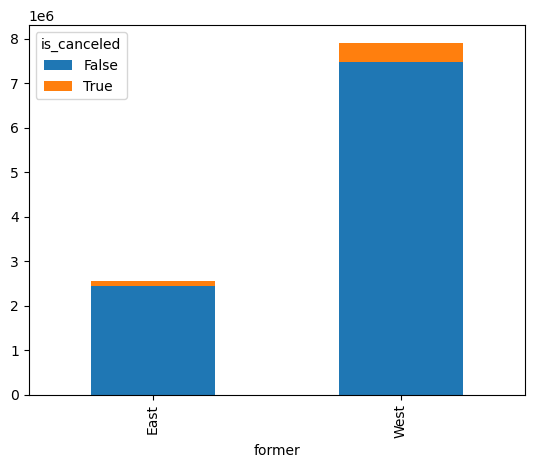

In [8]:
crosstab_canceled_per_former.plot(kind="bar", stacked=True)

### Canceled vs. Season

In [9]:
crosstab_canceled_per_season = pd.crosstab(df['season'], df['is_canceled'])

crosstab_canceled_per_season

is_canceled,False,True
season,,
Autumn,2264211,140201
Spring,2292987,100644
Summer,3034666,199645
Winter,2316428,109695


In [10]:
canceled_per_season_chi2_statistic, canceled_per_season_chi2_p_value, _, _ = chi2_contingency(crosstab_canceled_per_season)


print(f"P-value: {canceled_per_season_chi2_p_value.round(2)}")
print(f"Cramér's V value of {association(crosstab_canceled_per_season, method="cramer")}")

P-value: 0.0
Cramér's V value of 0.03785058947379648


<Axes: xlabel='season'>

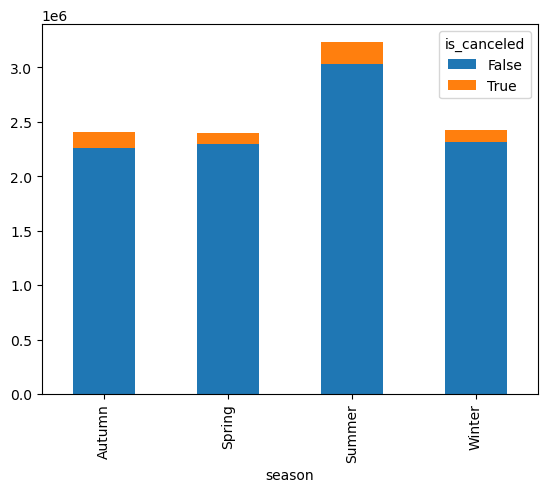

In [11]:
crosstab_canceled_per_season.plot(kind="bar", stacked=True)

### Train type vs. Former (West/East)

In [40]:
crosstab_type_per_former = pd.crosstab(df['former'], df['train_type'])

crosstab_type_per_former

train_type,IC,ICE,IRE,RB,RE
former,,,,,
East,125249,341747,417,834453,1243968
West,305023,1606601,58352,2597902,3344765


In [13]:
type_per_former_chi2_statistic, type_per_former_chi2_p_value, _, _ = chi2_contingency(crosstab_type_per_former)


print(f"P-value: {type_per_former_chi2_p_value.round(2)}")
print(f"Cramér's V value of {association(crosstab_type_per_former, method="cramer")}")

P-value: 0.0
Cramér's V value of 0.0933584346678852


<Axes: xlabel='former'>

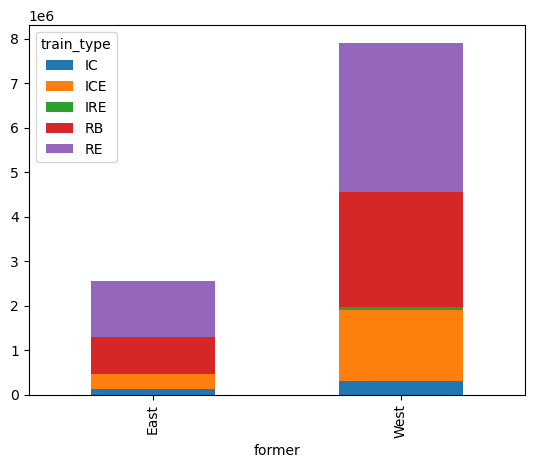

In [14]:
crosstab_type_per_former.plot(kind="bar", stacked=True)

### Punctuality vs. Former (West/East)

In [45]:
crosstab_punctuality_per_former = pd.crosstab(df['former'], df['punctuality'])

crosstab_punctuality_per_former

punctuality,Canceled,Early,Late,On time
former,,,,
East,111620,74610,389872,1969732
West,438565,242068,1946776,5285234


In [46]:
punctuality_per_former_chi2_statistic, punctuality_per_former_chi2_p_value, _, _ = chi2_contingency(crosstab_punctuality_per_former)


print(f"P-value: {punctuality_per_former_chi2_p_value.round(2)}")
print(f"Cramér's V value of {association(crosstab_punctuality_per_former, method="cramer")}")

P-value: 0.0
Cramér's V value of 0.10277234628346224


<Axes: xlabel='former'>

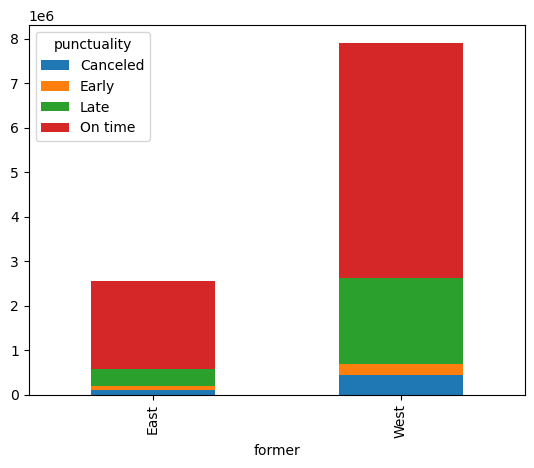

In [47]:
crosstab_punctuality_per_former.plot(kind="bar", stacked=True)

### Punctuality vs. Season

In [48]:
crosstab_punctuality_per_season = pd.crosstab(df['season'], df['punctuality'])

crosstab_punctuality_per_season

punctuality,Canceled,Early,Late,On time
season,,,,
Autumn,140201,65127,569403,1629681
Spring,100644,75953,522357,1694677
Summer,199645,95813,762335,2176518
Winter,109695,79785,482553,1754090


In [49]:
punctuality_per_season_chi2_statistic, punctuality_per_season_chi2_p_value, _, _ = chi2_contingency(crosstab_punctuality_per_season)


print(f"P-value: {punctuality_per_season_chi2_p_value.round(2)}")
print(f"Cramér's V value of {association(crosstab_punctuality_per_season, method="cramer")}")

P-value: 0.0
Cramér's V value of 0.032572585921446504


<Axes: xlabel='season'>

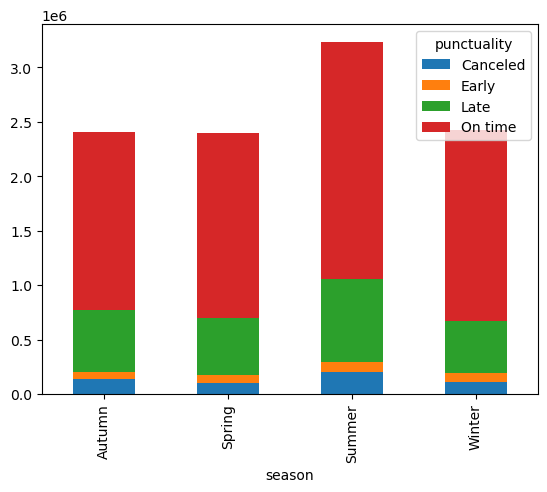

In [50]:
crosstab_punctuality_per_season.plot(kind="bar", stacked=True)

### Punctuality vs. Train type

In [57]:
crosstab_punctuality_per_train_type = pd.crosstab(df['train_type'], df['punctuality'])

crosstab_punctuality_per_train_type

punctuality,Canceled,Early,Late,On time
train_type,,,,
IC,32953,10557,142640,244122
ICE,143095,53623,748015,1003615
IRE,1762,1256,11068,44683
RB,165175,129804,462085,2675291
RE,207200,121438,972840,3287255


In [63]:
crosstab_punctuality_per_train_type(normalize=True)

TypeError: 'DataFrame' object is not callable

In [58]:
punctuality_per_train_type_chi2_statistic, punctuality_per_train_type_chi2_p_value, _, _ = chi2_contingency(crosstab_punctuality_per_train_type)


print(f"P-value: {punctuality_per_train_type_chi2_p_value.round(2)}")
print(f"Cramér's V value of {association(crosstab_punctuality_per_train_type, method="cramer")}")

P-value: 0.0
Cramér's V value of 0.1321792852872798


<Axes: xlabel='train_type'>

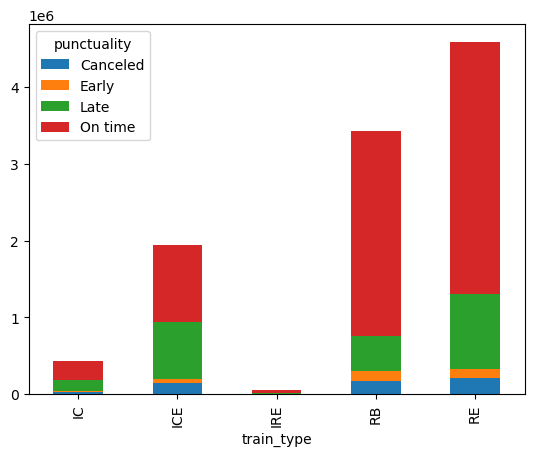

In [59]:
crosstab_punctuality_per_train_type.plot(kind="bar", stacked=True)

## Numerical vs. Categorical variables

In [28]:
# Considering only non-canceled trains. 
df_noncanceled = df[df["punctuality"] != "Canceled"]
df_late = df[df["punctuality"] == "Late"]
df_early = df[df["punctuality"] == "Early"]
df_ontime = df[df["punctuality"] == "On time"]

# Calculate late trains outliers
Uw = 21 + (1.5 * (21 - 8))
df_late_nooutliers = df_late[df_late["delay_in_min"] < Uw]
df_late_onlyoutliers = df_late[df_late["delay_in_min"] >= Uw]

### Delay vs. Former (West/East)

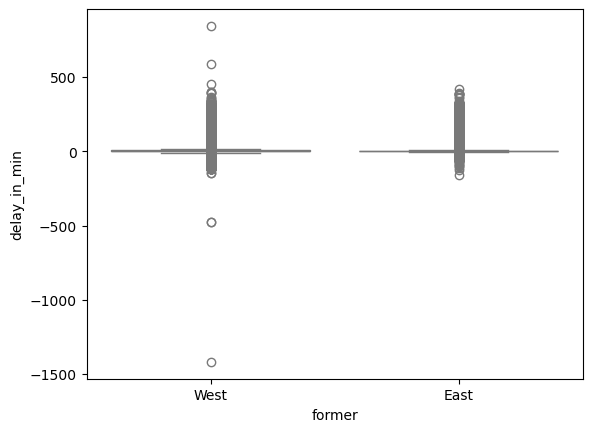

In [29]:
# All trains
sns.boxplot(data=df_noncanceled, x="former", y="delay_in_min", palette="coolwarm", hue=df_noncanceled["former"])
plt.show();

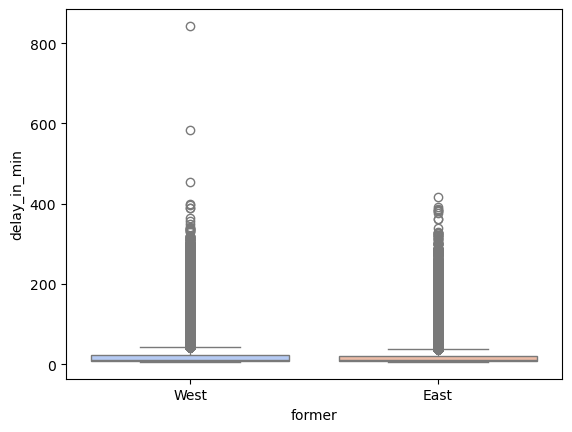

In [30]:
# Only late trains
sns.boxplot(data=df_late, x="former", y="delay_in_min", palette="coolwarm", hue=df_late["former"])
plt.show();

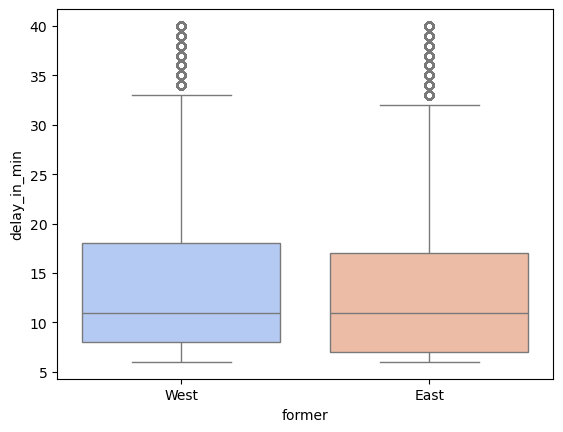

In [31]:
# Only late trains without outliers
sns.boxplot(data=df_late_nooutliers, x="former", y="delay_in_min", palette="coolwarm", hue=df_late_nooutliers["former"])
plt.show();

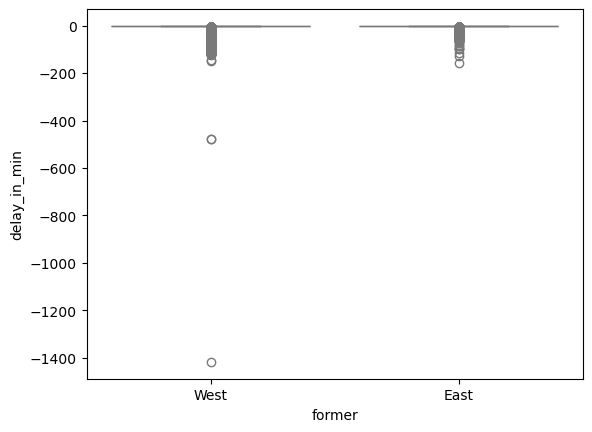

In [32]:
# Only early trains
sns.boxplot(data=df_early, x="former", y="delay_in_min", palette="coolwarm", hue=df_early["former"])
plt.show();

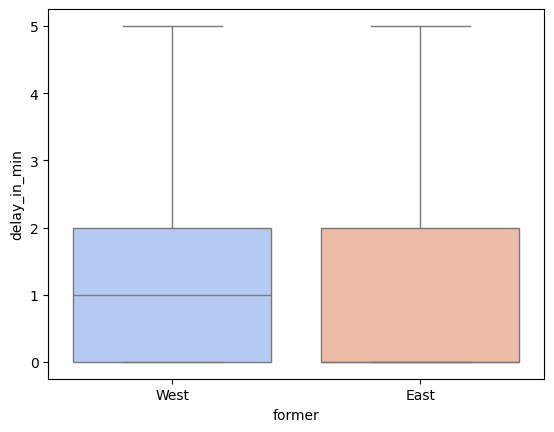

In [33]:
# Only trains on time
sns.boxplot(data=df_ontime, x="former", y="delay_in_min", palette="coolwarm", hue=df_ontime["former"])
plt.show();

### Delay vs. Seasons

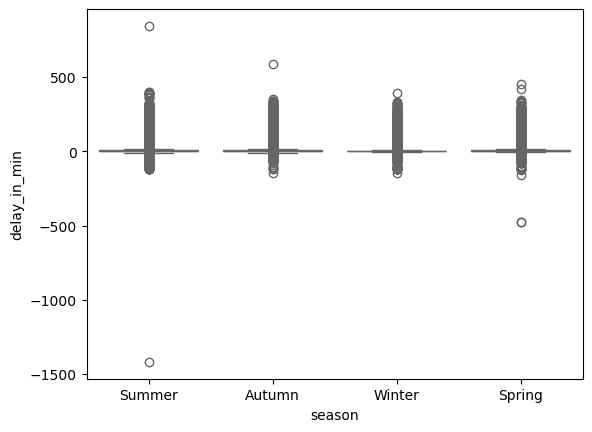

In [64]:
# All trains
sns.boxplot(data=df_noncanceled, x="season", y="delay_in_min", palette="coolwarm", hue=df_noncanceled["season"])
plt.show();

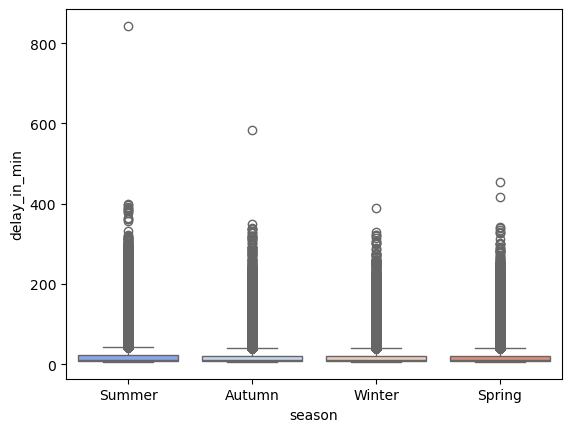

In [65]:
# Only late trains
sns.boxplot(data=df_late, x="season", y="delay_in_min", palette="coolwarm", hue=df_late["season"])
plt.show();

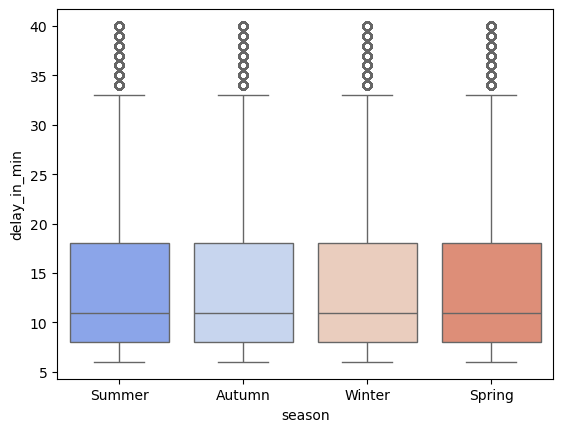

In [66]:
# Only late trains without outliers
sns.boxplot(data=df_late_nooutliers, x="season", y="delay_in_min", palette="coolwarm", hue=df_late_nooutliers["season"])
plt.show();

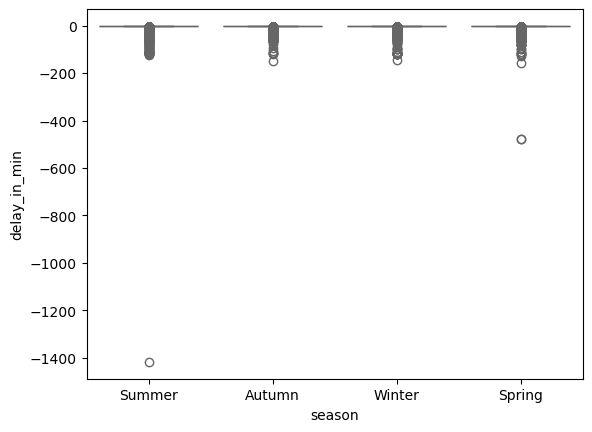

In [67]:
# Only early trains
sns.boxplot(data=df_early, x="season", y="delay_in_min", palette="coolwarm", hue=df_early["season"])
plt.show();

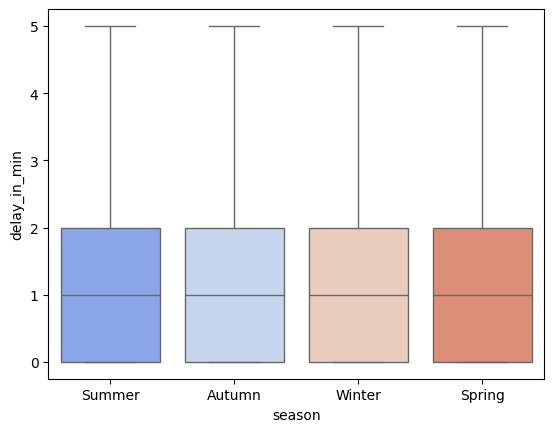

In [68]:
# Only trains on time
sns.boxplot(data=df_ontime, x="season", y="delay_in_min", palette="coolwarm", hue=df_ontime["season"])
plt.show();

### Delay vs. Train type

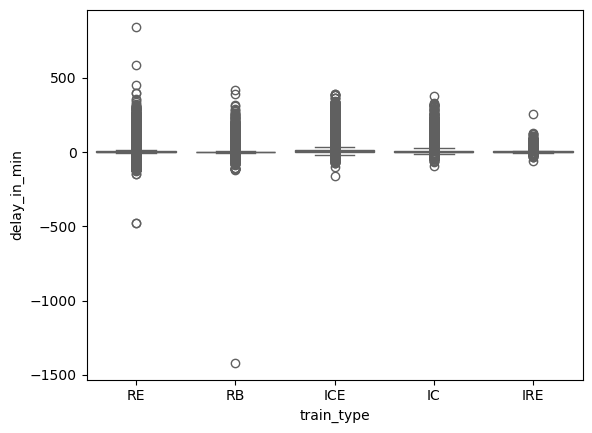

In [74]:
# All trains
sns.boxplot(data=df_noncanceled, x="train_type", y="delay_in_min", palette="coolwarm", hue=df_noncanceled["train_type"])
plt.show();

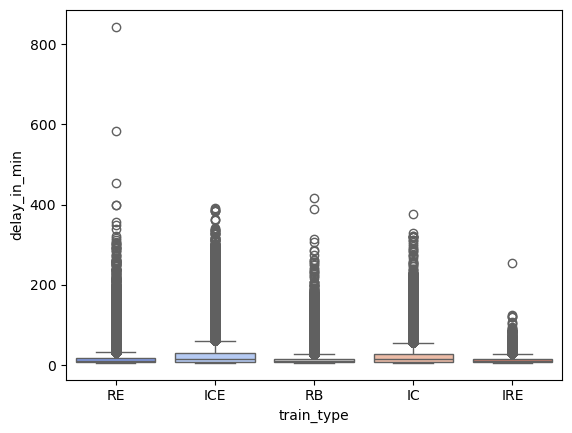

In [75]:
# Only late trains
sns.boxplot(data=df_late, x="train_type", y="delay_in_min", palette="coolwarm", hue=df_late["train_type"])
plt.show();

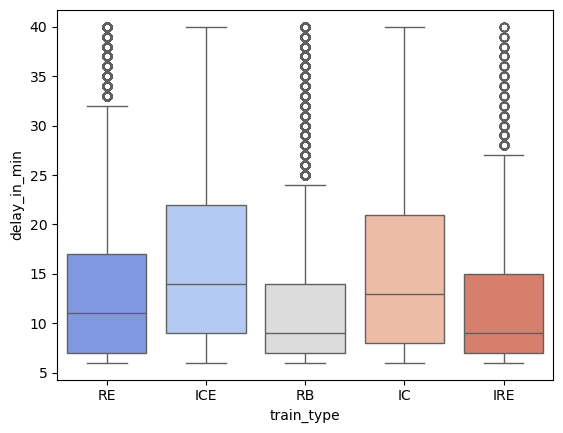

In [76]:
# Only late trains without outliers
sns.boxplot(data=df_late_nooutliers, x="train_type", y="delay_in_min", palette="coolwarm", hue=df_late_nooutliers["train_type"])
plt.show();

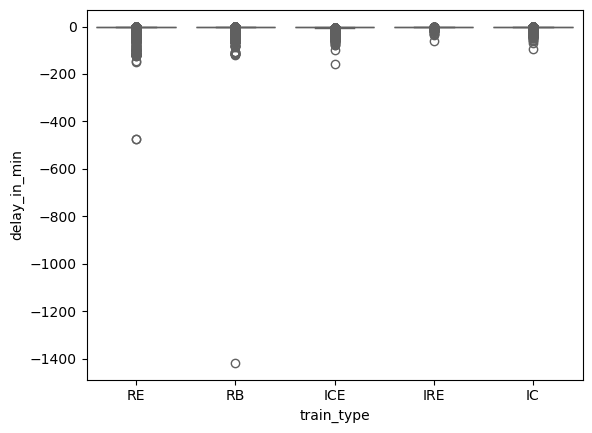

In [77]:
# Only early trains
sns.boxplot(data=df_early, x="train_type", y="delay_in_min", palette="coolwarm", hue=df_early["train_type"])
plt.show();

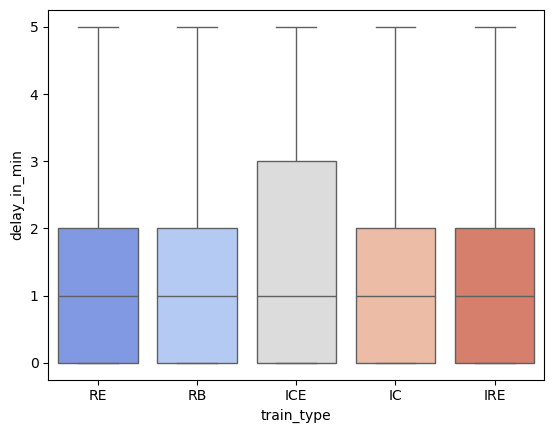

In [78]:
# Only trains on time
sns.boxplot(data=df_ontime, x="train_type", y="delay_in_min", palette="coolwarm", hue=df_ontime["train_type"])
plt.show();